# An attempt to understand the broadband performance in various Florida counties based on Ookla's data

## Imports Libraries

In [1]:
import turicreate as tc
import geopandas as gp
import pandas as pd
from geopandas import GeoDataFrame
from adjustText import adjust_text
from shapely import wkt
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


## Read in data
### I am using Turicreate here

In [2]:
sf = tc.SFrame.read_csv('ookla_combined_fl.csv')

Finished parsing file /Users/prashantmudgal/Downloads/ookla_combined_fl.csv

Parsing completed. Parsed 100 lines in 0.334181 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,int,int,str,str,int,int,int,int,str,int,float,str,int,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 167840 lines. Lines per second: 256956

Finished parsing file /Users/prashantmudgal/Downloads/ookla_combined_fl.csv

Parsing completed. Parsed 259468 lines in 0.846139 secs.

In [4]:
sf.print_rows(2)

+-----------------+------------+------------+------------+-------+---------+
|     quadkey     | avg_d_kbps | avg_u_kbps | avg_lat_ms | tests | devices |
+-----------------+------------+------------+------------+-------+---------+
| 320201332021332 |   90726    |   28194    |     35     |   3   |    2    |
| 320231100220123 |   159542   |   31827    |     14     |   60  |    10   |
+-----------------+------------+------------+------------+-------+---------+
+-------+---------+------+---------+----------+---------+----------------------+
|  type | quarter | year | STATEFP | COUNTYFP | TRACTCE |       AFFGEOID       |
+-------+---------+------+---------+----------+---------+----------------------+
| fixed |    Q1   | 2021 |    12   |    37    |  970302 | 1400000US12037970302 |
| fixed |    Q1   | 2021 |    12   |    99    |   905   | 1400000US12099000905 |
+-------+---------+------+---------+----------+---------+----------------------+
+-------------+---------+------+-----------+--------

In [5]:
# Not needed for his
sf_fcc = tc.SFrame.read_csv('fcc_477_census_tract_FL.csv')
sf_acs = tc.SFrame.read_csv('acs_2019_FL.csv')

Finished parsing file /Users/prashantmudgal/Downloads/fcc_477_census_tract_FL.csv

Parsing completed. Parsed 100 lines in 0.027017 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/prashantmudgal/Downloads/fcc_477_census_tract_FL.csv

Parsing completed. Parsed 4205 lines in 0.009288 secs.

## Read the GeoIDs and county specfic info from census webpage

In [17]:
county_url = "https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip" 


In [18]:
counties = gp.read_file(county_url)

#### 12 is state code for Florida

In [26]:
fl_counties = counties.loc[counties['STATEFP'] == '12'].to_crs(4326)
fl_counties.head(2)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
71,12,053,00295751,12053,Hernando,Hernando County,06,H1,G4020,None,45300,None,A,1224962206,300591492,+28.5730426,-082.4662272,"POLYGON ((-82.25329 28.47849, -82.25329 28.478..."
72,12,129,00306912,12129,Wakulla,Wakulla County,06,H1,G4020,None,45220,None,A,1570615733,334902363,+30.1394320,-084.3748463,"POLYGON ((-84.50434 30.30186, -84.50432 30.301..."


In [33]:
# for some weird reason, I have to take it export a file and then read it again
fl_counties.to_csv('fl_counties.csv')

In [34]:
sf_fl = tc.SFrame.read_csv('fl_counties.csv')

Finished parsing file /Users/prashantmudgal/Downloads/fl_counties.csv

Parsing completed. Parsed 67 lines in 0.093984 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,int,str,str,int,str,str,int,int,int,str,int,int,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/prashantmudgal/Downloads/fl_counties.csv

Parsing completed. Parsed 67 lines in 0.074084 secs.

In [41]:
sf_joined = sf.join(sf_fl, on = "COUNTYFP", how = "inner")

In [42]:
sf_joined

quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,type,quarter,year,STATEFP,COUNTYFP
320201332021332,90726,28194,35,3,2,fixed,Q1,2021,12,37
320231100220123,159542,31827,14,60,10,fixed,Q1,2021,12,99
320231102200112,211000,52752,14,37,18,fixed,Q1,2021,12,99
320231223033003,115365,20575,15,7,5,fixed,Q1,2021,12,87
320212301232330,217592,48549,9,21,8,fixed,Q1,2021,12,57
320212301202220,190419,98559,7,108,18,fixed,Q1,2021,12,57
320231013331103,149333,73235,9,25,10,fixed,Q1,2021,12,99
320212321200313,144311,83531,9,33,18,fixed,Q1,2021,12,81
320210213000320,5626,534,42,41,3,fixed,Q1,2021,12,79
320211200200101,227462,148008,12,6,3,fixed,Q1,2021,12,89


#### Convert kbps to mbps

In [45]:
sf_joined['avg_d_mbps'] = sf_joined['avg_d_kbps'] / 1000
sf_joined['avg_u_mbps'] = sf_joined['avg_u_kbps'] / 1000

In [67]:
sf_fl_speeds = sf_joined.groupby(['GEOID.1', 'NAMELSAD', 'geometry'], tc.aggregate.SUM('tests'), tc.aggregate.AVG('avg_d_mbps')).sort('Avg of avg_d_mbps', ascending= False)

## The frame created above contains most info but the geometry has gotten converted to object. I am sure this can be done in turi but I am moving back to pandas

In [68]:
fl_sp = tc.SFrame.to_dataframe(sf_fl_speeds)

In [69]:
fl_sp

,GEOID.1,NAMELSAD,geometry,Sum of tests,Avg of avg_d_mbps
0,12109,St. Johns County,"POLYGON ((-81.43392299999999 30.115092, -81.43...",64460,151.952769
1,12057,Hillsborough County,"POLYGON ((-82.56581899999999 27.817603, -82.56...",278143,150.189102
2,12031,Duval County,"POLYGON ((-81.83121199999999 30.467449, -81.82...",145765,146.825791
3,12005,Bay County,"POLYGON ((-85.995651 30.281311, -85.995622 30....",31745,143.276638
4,12019,Clay County,"POLYGON ((-81.798227 30.188998, -81.792732 30....",33456,143.262723
...,...,...,...,...,...
62,12121,Suwannee County,"POLYGON ((-83.06497499999999 30.064569, -83.06...",4406,38.886409
63,12059,Holmes County,"POLYGON ((-85.83112299999999 30.99412, -85.830...",1718,37.020301
64,12049,Hardee County,"POLYGON ((-82.054467 27.595246, -82.054473 27....",3003,29.912791
65,12075,Levy County,"POLYGON ((-83.04863399999999 29.379144, -83.04...",5767,27.853357


In [75]:
labels = ["0 to 25 Mbps", "25 to 50 Mbps", "50 to 100 Mbps", "100 to 150 Mbps", "150 to 200 Mbps"]

In [79]:
fl_sp['speed_grp'] = pd.cut(
    fl_sp['Avg of avg_d_mbps'], 
    (0, 25, 50, 100, 150, 200), 
    right=False, 
    labels = labels
)

In [100]:
fl_sp

,GEOID.1,NAMELSAD,geometry,Sum of tests,Avg of avg_d_mbps,group
0,12109,St. Johns County,"POLYGON ((-81.43392299999999 30.115092, -81.43...",64460,151.952769,150 to 200 Mbps
1,12057,Hillsborough County,"POLYGON ((-82.56581899999999 27.817603, -82.56...",278143,150.189102,150 to 200 Mbps
2,12031,Duval County,"POLYGON ((-81.83121199999999 30.467449, -81.82...",145765,146.825791,100 to 150 Mbps
3,12005,Bay County,"POLYGON ((-85.995651 30.281311, -85.995622 30....",31745,143.276638,100 to 150 Mbps
4,12019,Clay County,"POLYGON ((-81.798227 30.188998, -81.792732 30....",33456,143.262723,100 to 150 Mbps
...,...,...,...,...,...,...
62,12121,Suwannee County,"POLYGON ((-83.06497499999999 30.064569, -83.06...",4406,38.886409,25 to 50 Mbps
63,12059,Holmes County,"POLYGON ((-85.83112299999999 30.99412, -85.830...",1718,37.020301,25 to 50 Mbps
64,12049,Hardee County,"POLYGON ((-82.054467 27.595246, -82.054473 27....",3003,29.912791,25 to 50 Mbps
65,12075,Levy County,"POLYGON ((-83.04863399999999 29.379144, -83.04...",5767,27.853357,25 to 50 Mbps


In [88]:
# This is not really required as it didn't change anything. 
merged = GeoDataFrame(fl_sp)


In [150]:
merged

,GEOID.1,NAMELSAD,geometry,Sum of tests,Avg of avg_d_mbps,group
0,12109,St. Johns County,"POLYGON ((-81.43392299999999 30.115092, -81.43...",64460,151.952769,150 to 200 Mbps
1,12057,Hillsborough County,"POLYGON ((-82.56581899999999 27.817603, -82.56...",278143,150.189102,150 to 200 Mbps
2,12031,Duval County,"POLYGON ((-81.83121199999999 30.467449, -81.82...",145765,146.825791,100 to 150 Mbps
3,12005,Bay County,"POLYGON ((-85.995651 30.281311, -85.995622 30....",31745,143.276638,100 to 150 Mbps
4,12019,Clay County,"POLYGON ((-81.798227 30.188998, -81.792732 30....",33456,143.262723,100 to 150 Mbps
...,...,...,...,...,...,...
62,12121,Suwannee County,"POLYGON ((-83.06497499999999 30.064569, -83.06...",4406,38.886409,25 to 50 Mbps
63,12059,Holmes County,"POLYGON ((-85.83112299999999 30.99412, -85.830...",1718,37.020301,25 to 50 Mbps
64,12049,Hardee County,"POLYGON ((-82.054467 27.595246, -82.054473 27....",3003,29.912791,25 to 50 Mbps
65,12075,Levy County,"POLYGON ((-83.04863399999999 29.379144, -83.04...",5767,27.853357,25 to 50 Mbps


## Conversion of object to geometry

In [163]:
# This step can be done directly on fl_sp frame

merged['geometry'] = merged['geometry'].apply(wkt.loads)
my_geo_df = gp.GeoDataFrame(merged, geometry='geometry')


## Find the centroid

In [164]:
my_geo_df["centroid"] = my_geo_df["geometry"].centroid


In [193]:
my_geo_df

,GEOID.1,NAMELSAD,geometry,Sum of tests,Avg of avg_d_mbps,group,centroid
0,12109,St. Johns County,"POLYGON ((-81.43392 30.11509, -81.43413 30.125...",64460,151.952769,150 to 200 Mbps,POINT (-81.40989 29.91218)
1,12057,Hillsborough County,"POLYGON ((-82.56582 27.81760, -82.56612 27.823...",278143,150.189102,150 to 200 Mbps,POINT (-82.34692 27.90623)
2,12031,Duval County,"POLYGON ((-81.83121 30.46745, -81.82340 30.473...",145765,146.825791,100 to 150 Mbps,POINT (-81.64801 30.33544)
3,12005,Bay County,"POLYGON ((-85.99565 30.28131, -85.99562 30.282...",31745,143.276638,100 to 150 Mbps,POINT (-85.63262 30.23765)
4,12019,Clay County,"POLYGON ((-81.79823 30.18900, -81.79273 30.189...",33456,143.262723,100 to 150 Mbps,POINT (-81.85788 29.98307)
...,...,...,...,...,...,...,...
62,12121,Suwannee County,"POLYGON ((-83.06497 30.06457, -83.06537 30.064...",4406,38.886409,25 to 50 Mbps,POINT (-82.99149 30.19561)
63,12059,Holmes County,"POLYGON ((-85.83112 30.99412, -85.83096 30.994...",1718,37.020301,25 to 50 Mbps,POINT (-85.81410 30.86789)
64,12049,Hardee County,"POLYGON ((-82.05447 27.59525, -82.05447 27.599...",3003,29.912791,25 to 50 Mbps,POINT (-81.81001 27.49271)
65,12075,Levy County,"POLYGON ((-83.04863 29.37914, -83.04724 29.379...",5767,27.853357,25 to 50 Mbps,POINT (-82.78861 29.28221)


## Random 15 samples for plotting

In [191]:
my_geo_df_sample = my_geo_df.sample(15, random_state=2)

## Please refer to https://github.com/teamookla/ookla-open-data/tree/master/tutorials 

8

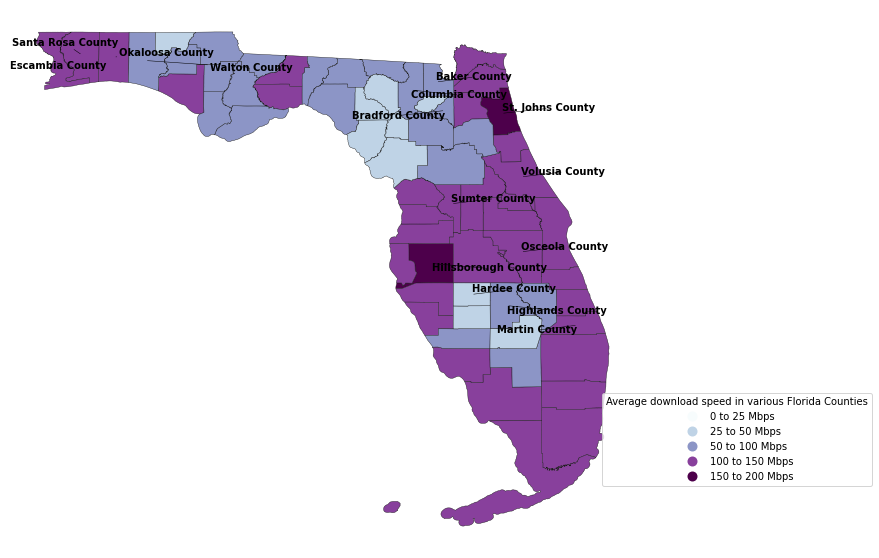

In [192]:
fig, ax = plt.subplots(1, figsize=(20, 10))

my_geo_df.plot(
    column="group", cmap="BuPu", linewidth=0.4, ax=ax, edgecolor="0.1", legend=True
)

ax.axis("off")

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.38, 0.3))
leg.set_title("Average download speed in various Florida Counties")


texts = []
for x, y, label in zip(my_geo_df_sample.centroid.x, my_geo_df_sample.centroid.y, my_geo_df_sample["NAMELSAD"]):
    texts.append(plt.text(x, y, label, fontsize=10, fontweight="bold", ha="left"))

adjust_text(
    texts,
    force_points=0.3,
    force_text=0.8,
    expand_points=(1, 1),
    expand_text=(1, 1),
    arrowprops=dict(arrowstyle="-", color="black", lw=0.5),
)


# As expected, the rich counties have better performing internet speeds.
### The same can be established from the ACS data as well by taking socioeconomic data into account.